In [1]:
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris

from imblearn.datasets import make_imbalance

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks

In [2]:
def plot_pie(y):
    target_stats = Counter(y)
    labels = list(target_stats.keys())
    sizes = list(target_stats.values())
    explode = tuple([0.1] * len(target_stats))

    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return '{p:.2f}%  ({v:d})'.format(p=pct, v=val)
        return my_autopct

    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, shadow=True,
           autopct=make_autopct(sizes))
    ax.axis('equal')

In [3]:
def save_csv(X, y, path_to_csv):
    header = ["ID_code", "target"]
    for i in range(0, 200):
        header.append("var_" + str(i))
    df = pd.DataFrame(X)
    df.insert(1, "target", y)
    df.to_csv(path_to_csv, header=header, index=None)

## Cargar datos

In [4]:
data = pd.read_csv('train.csv')
#data = df.drop(columns=['ID_code'])
target = data['target']
data.drop(columns=['target'], inplace=True)
data.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


## Información original del set de datos

Information of the original traning set: 
 Counter({0: 179902, 1: 20098})


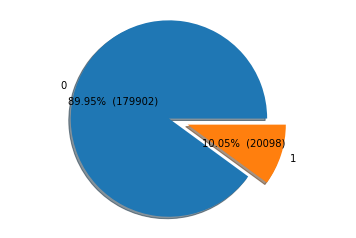

In [5]:
print('Information of the original traning set: \n {}'.format(
    Counter(target)))
plot_pie(target)

## Balanceo aleatorio

Information of the train data set after making it balanced by under-sampling: 
 sampling_strategy=not minority 
 y: Counter({0: 20098, 1: 20098})


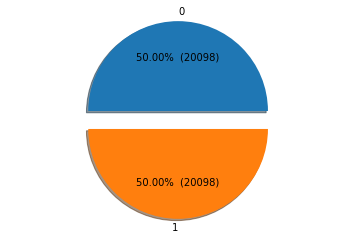

In [6]:
sampling_strategy = 'not minority'

rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(data, target)
print('Information of the train data set after making it '
      'balanced by under-sampling: \n sampling_strategy={} \n y: {}'
      .format(sampling_strategy, Counter(y_res)))
plot_pie(y_res)
save_csv(X_res, y_res, "random_under_sampler.csv")

Information of the train data set after making it balanced by over-sampling: 
 sampling_strategy=not majority 
 y: Counter({0: 179902, 1: 179902})


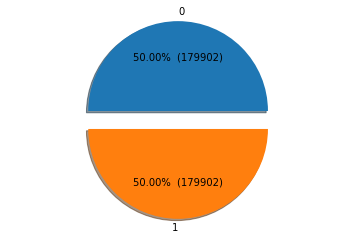

In [7]:
sampling_strategy = 'not majority'

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_res, y_res = ros.fit_resample(data, target)
print('Information of the train data set after making it '
      'balanced by over-sampling: \n sampling_strategy={} \n y: {}'
      .format(sampling_strategy, Counter(y_res)))
plot_pie(y_res)
save_csv(X_res, y_res, "random_over_sampler.csv")